# [Kaggle] Dogs vs. Cats

Create an algorithm to distinguish dogs from cats

https://www.kaggle.com/c/dogs-vs-cats/overview

#### 코랩 API 세팅

In [1]:
!pip install kaggle --upgrade

In [2]:
import os

'''
kaggle account에서 json 파일 다운받고 설정해야함

os.environ['KAGGLE_USERNAME'] = 'json에적힌username'
os.environ['KAGGLE_KEY'] = 'json에적힌key'
'''

In [3]:
!kaggle -h

usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        config {view, set, unset}
    competitions        Commands related to Kaggle competitions
    datasets            Commands related to Kaggle datasets
    kernels             Commands related to Kaggle kernels
    config              Configuration settings


#### Dataset download

In [4]:
!kaggle competitions download -c dogs-vs-cats

test1.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)
train.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip '*zip'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          
  inflating: test1/5521.jpg          
  inflating: t

In [6]:
!ls

sample_data  sampleSubmission.csv  test1  test1.zip  train  train.zip


#### dataset EDA

In [1]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

In [2]:
train_path = '/content/train'

train_file_list = os.listdir(train_path)
print(len(train_file_list))
print(train_file_list)

25000
['dog.7487.jpg', 'dog.10086.jpg', 'dog.6690.jpg', 'dog.9862.jpg', 'dog.4415.jpg', 'dog.9975.jpg', 'cat.3167.jpg', 'cat.4031.jpg', 'dog.12288.jpg', 'cat.8370.jpg', 'cat.348.jpg', 'cat.10026.jpg', 'dog.12053.jpg', 'dog.10430.jpg', 'cat.4729.jpg', 'cat.10592.jpg', 'cat.8451.jpg', 'cat.7630.jpg', 'cat.1572.jpg', 'cat.5372.jpg', 'cat.11545.jpg', 'dog.12470.jpg', 'dog.4072.jpg', 'cat.5966.jpg', 'dog.10982.jpg', 'cat.12423.jpg', 'cat.885.jpg', 'dog.7200.jpg', 'cat.7115.jpg', 'cat.5294.jpg', 'cat.7329.jpg', 'cat.2875.jpg', 'cat.11285.jpg', 'dog.7490.jpg', 'cat.7677.jpg', 'cat.2927.jpg', 'cat.1376.jpg', 'dog.5324.jpg', 'dog.10604.jpg', 'dog.4063.jpg', 'cat.8061.jpg', 'dog.4382.jpg', 'cat.5381.jpg', 'dog.1428.jpg', 'cat.10966.jpg', 'dog.5465.jpg', 'cat.638.jpg', 'cat.4.jpg', 'cat.2022.jpg', 'cat.7209.jpg', 'dog.1895.jpg', 'cat.2111.jpg', 'cat.7810.jpg', 'cat.8585.jpg', 'cat.3841.jpg', 'dog.7020.jpg', 'cat.11725.jpg', 'dog.7147.jpg', 'cat.7081.jpg', 'dog.10201.jpg', 'cat.9240.jpg', 'dog.987

In [3]:
test_path = '/content/test1'

test_file_list = os.listdir(test_path)
print(len(test_file_list))
print(test_file_list)

12500
['1379.jpg', '11340.jpg', '10618.jpg', '2706.jpg', '3318.jpg', '3928.jpg', '8636.jpg', '853.jpg', '3099.jpg', '7788.jpg', '10320.jpg', '6287.jpg', '6784.jpg', '10006.jpg', '1888.jpg', '4038.jpg', '238.jpg', '11480.jpg', '3897.jpg', '2271.jpg', '1592.jpg', '6691.jpg', '8192.jpg', '6816.jpg', '11287.jpg', '1895.jpg', '8553.jpg', '6241.jpg', '10524.jpg', '3031.jpg', '2957.jpg', '6474.jpg', '10106.jpg', '12434.jpg', '10546.jpg', '3094.jpg', '7820.jpg', '1769.jpg', '1336.jpg', '3955.jpg', '11094.jpg', '7858.jpg', '9389.jpg', '3025.jpg', '11628.jpg', '220.jpg', '5309.jpg', '9346.jpg', '12152.jpg', '3539.jpg', '8371.jpg', '7626.jpg', '439.jpg', '12041.jpg', '12459.jpg', '1481.jpg', '4986.jpg', '2174.jpg', '5910.jpg', '4950.jpg', '9766.jpg', '3535.jpg', '3358.jpg', '11003.jpg', '384.jpg', '3783.jpg', '9560.jpg', '11878.jpg', '12111.jpg', '11118.jpg', '12252.jpg', '2533.jpg', '1763.jpg', '1142.jpg', '2422.jpg', '6406.jpg', '3964.jpg', '5639.jpg', '6033.jpg', '12347.jpg', '3600.jpg', '4908

In [4]:
filenames = os.listdir('/content/train')

categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
df.head(10)

,filename,category
0,dog.7487.jpg,1
1,dog.10086.jpg,1
2,dog.6690.jpg,1
3,dog.9862.jpg,1
4,dog.4415.jpg,1
5,dog.9975.jpg,1
6,cat.3167.jpg,0
7,cat.4031.jpg,0
8,dog.12288.jpg,1
9,cat.8370.jpg,0


In [6]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'})

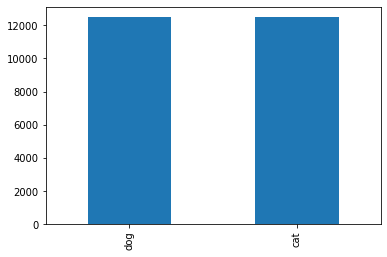

In [7]:
df['category'].value_counts().plot.bar()

In [8]:
target_counts = df['category'].value_counts()
print("Number of dogs in the dataset:{}".format(target_counts['dog']))
print("Number of cats in the dataset:{}".format(target_counts['cat']))

Number of dogs in the dataset:12500
Number of cats in the dataset:12500


#### Image 시각화

(499, 332)


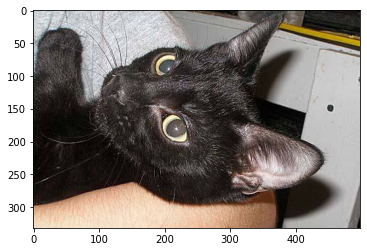

In [ ]:
sample = random.choice(filenames)
image = load_img('/content/train/'+sample)
print(image.size)
plt.imshow(image)

(479, 360)


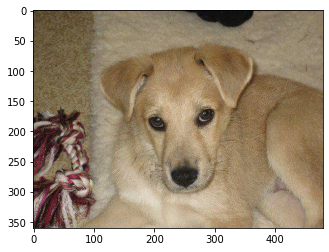

In [ ]:
sample1 = random.choice(filenames)
image1 = load_img('/content/train/'+sample1)
print(image1.size)
plt.imshow(image1)

#### model

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

#### data preprocessing

In [10]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

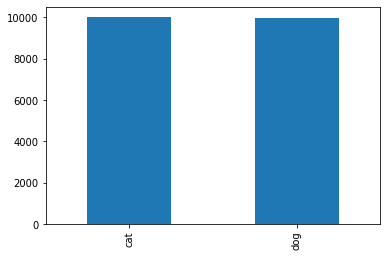

In [11]:
train_df['category'].value_counts().plot.bar()

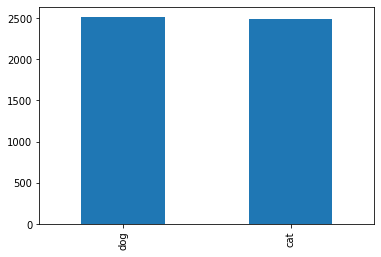

In [12]:
validate_df['category'].value_counts().plot.bar()

In [13]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [14]:
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/'

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test1')

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    train_dir, 
    x_col='filename',
    y_col='category',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=batch_size
)


validation_generator = test_datagen.flow_from_dataframe(
    validate_df, 
    train_dir, 
    x_col='filename',
    y_col='category',
    target_size=(150, 150),
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


In [15]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_steps=50,
    verbose=2
)

Epoch 1/100
100/100 - 14s - loss: 0.7262 - accuracy: 0.5247 - val_loss: 0.6819 - val_accuracy: 0.5867 - 14s/epoch - 142ms/step
Epoch 2/100
100/100 - 9s - loss: 0.6912 - accuracy: 0.5827 - val_loss: 0.6702 - val_accuracy: 0.6093 - 9s/epoch - 94ms/step
Epoch 3/100
100/100 - 9s - loss: 0.6804 - accuracy: 0.5880 - val_loss: 0.6482 - val_accuracy: 0.6347 - 9s/epoch - 88ms/step
Epoch 4/100
100/100 - 9s - loss: 0.6573 - accuracy: 0.6340 - val_loss: 0.6332 - val_accuracy: 0.6227 - 9s/epoch - 87ms/step
Epoch 5/100
100/100 - 11s - loss: 0.6006 - accuracy: 0.6820 - val_loss: 0.6328 - val_accuracy: 0.6107 - 11s/epoch - 112ms/step
Epoch 6/100
100/100 - 10s - loss: 0.5933 - accuracy: 0.6980 - val_loss: 0.5590 - val_accuracy: 0.7267 - 10s/epoch - 99ms/step
Epoch 7/100
100/100 - 9s - loss: 0.5966 - accuracy: 0.6987 - val_loss: 0.5680 - val_accuracy: 0.7227 - 9s/epoch - 89ms/step
Epoch 8/100
100/100 - 9s - loss: 0.6071 - accuracy: 0.6867 - val_loss: 0.5313 - val_accuracy: 0.7347 - 9s/epoch - 88ms/step


In [16]:
model.save('cats_and_dogs_final.h5')

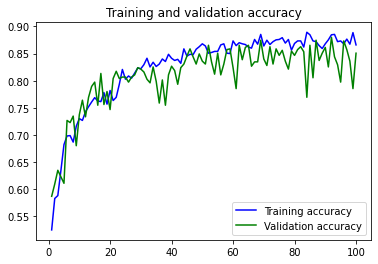

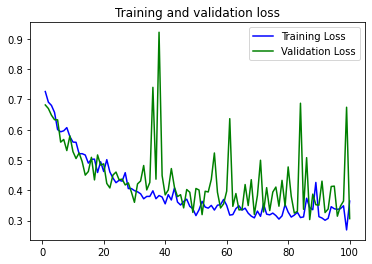

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 테스트 데이터셋 이용하여 평가

In [18]:
test_filenames = os.listdir('/content/test1/')

test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [19]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    '/content/test1', 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=(150, 150),
    batch_size=15,
    shuffle=False
)

Found 12500 validated image filenames.


In [20]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

In [21]:
test_df['category'] = np.argmax(predict, axis=-1)

In [22]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [23]:
test_df['category'] = test_df['category'].replace({0: 'cat', 1: 'dog'})

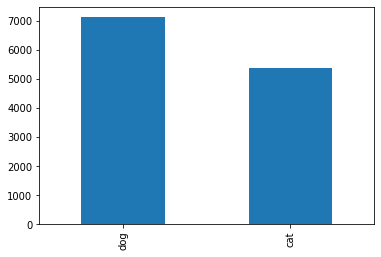

In [24]:
test_df['category'].value_counts().plot.bar()

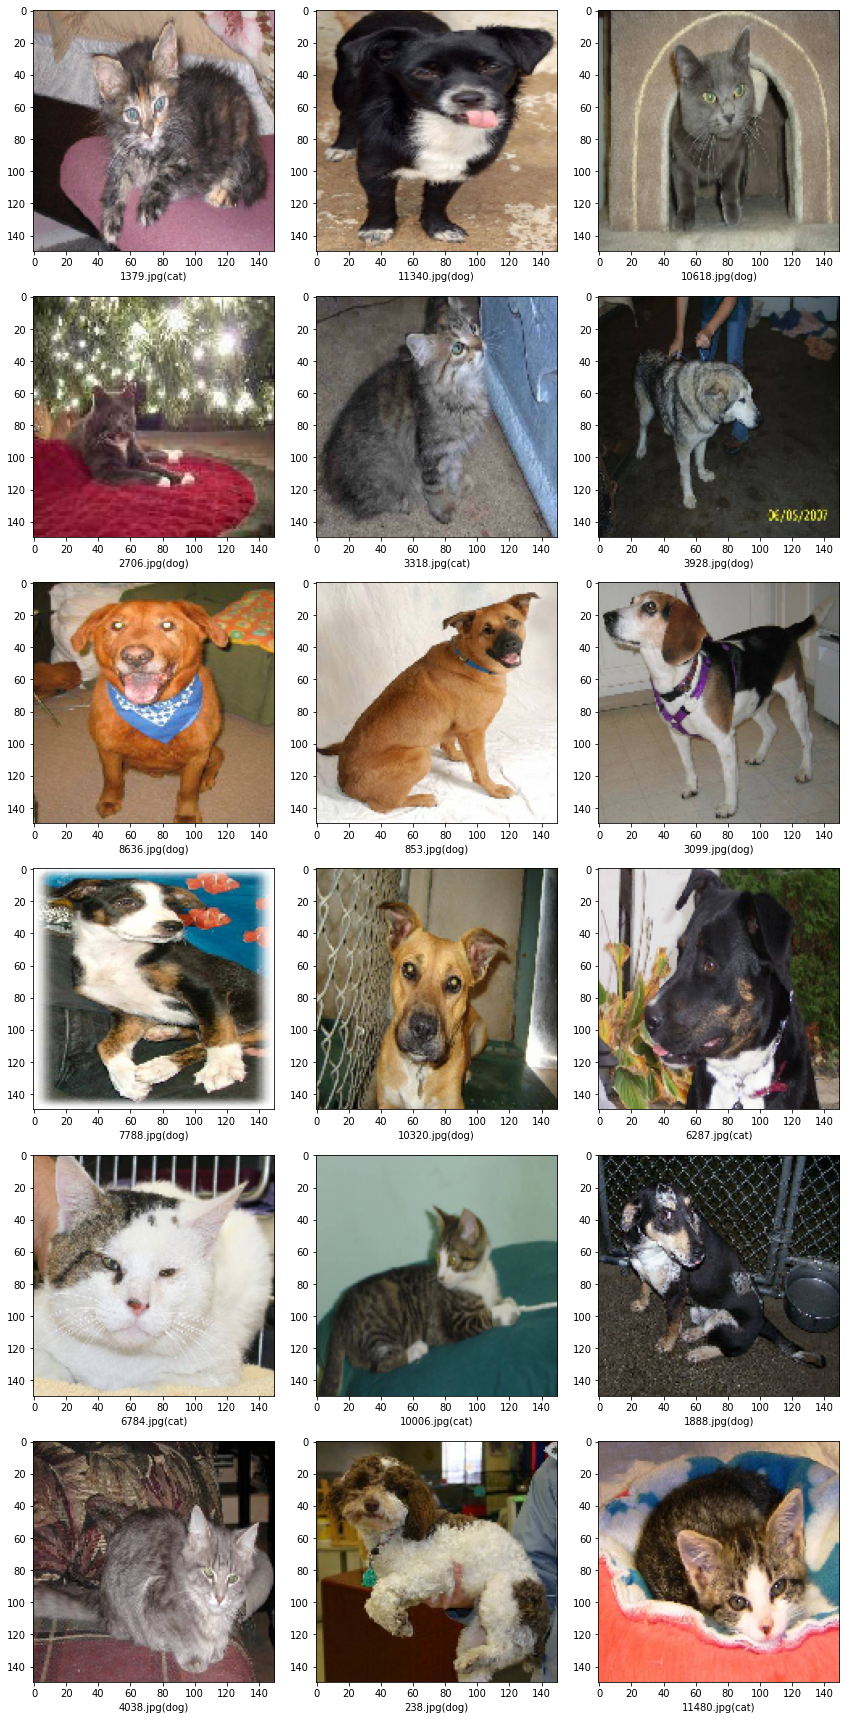

In [25]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img('/content/test1/'+filename, target_size=(150, 150))
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [26]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)